In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\deept\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('5 yrs wind generation.xlsx', 
                 parse_dates = ['Date'], index_col = 'Date')

In [3]:
df.head()

,Wind Generation(MU)
Date,
2017-01-01,41
2017-01-02,48
2017-01-03,45
2017-01-04,43
2017-01-05,29


In [4]:
df.tail()

,Wind Generation(MU)
Date,
2022-03-23,146
2022-03-24,133
2022-03-25,115
2022-03-26,73
2022-03-27,65


In [5]:
df.describe()

,Wind Generation(MU)
count,1912.000000
mean,151.653766
std,100.661306
min,5.000000
25%,80.750000
50%,114.000000
75%,207.000000
max,541.000000


In [6]:
# Checking shape of our data
df.shape
print("Our data contains", df.shape[0],"Rows and", df.shape[1], "Columns")

Our data contains 1912 Rows and 1 Columns


In [7]:
# Getting information of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1912 entries, 2017-01-01 to 2022-03-27
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Wind Generation(MU)  1912 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


In [8]:
# Datatypes of features
df.dtypes.value_counts()

int64    1
dtype: int64

In [9]:
# Checking for null values
df.isnull().values.any()

False

In [10]:
df.describe()

,Wind Generation(MU)
count,1912.000000
mean,151.653766
std,100.661306
min,5.000000
25%,80.750000
50%,114.000000
75%,207.000000
max,541.000000


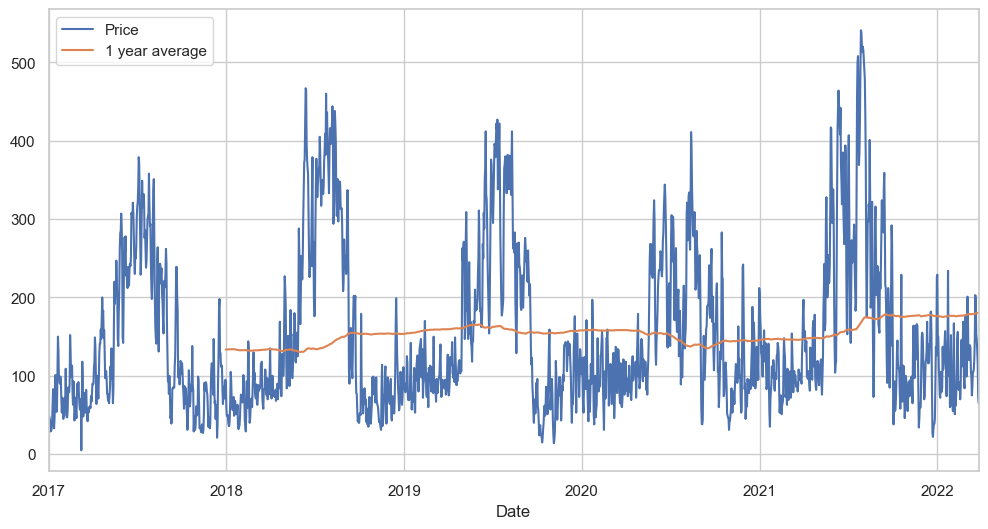

In [11]:
sns.set()
sns.set_style('whitegrid')
df['Wind Generation(MU)'].plot(figsize=(12,6),label='Price')
df['Wind Generation(MU)'].rolling(window=365).mean().plot(label='1 year average')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

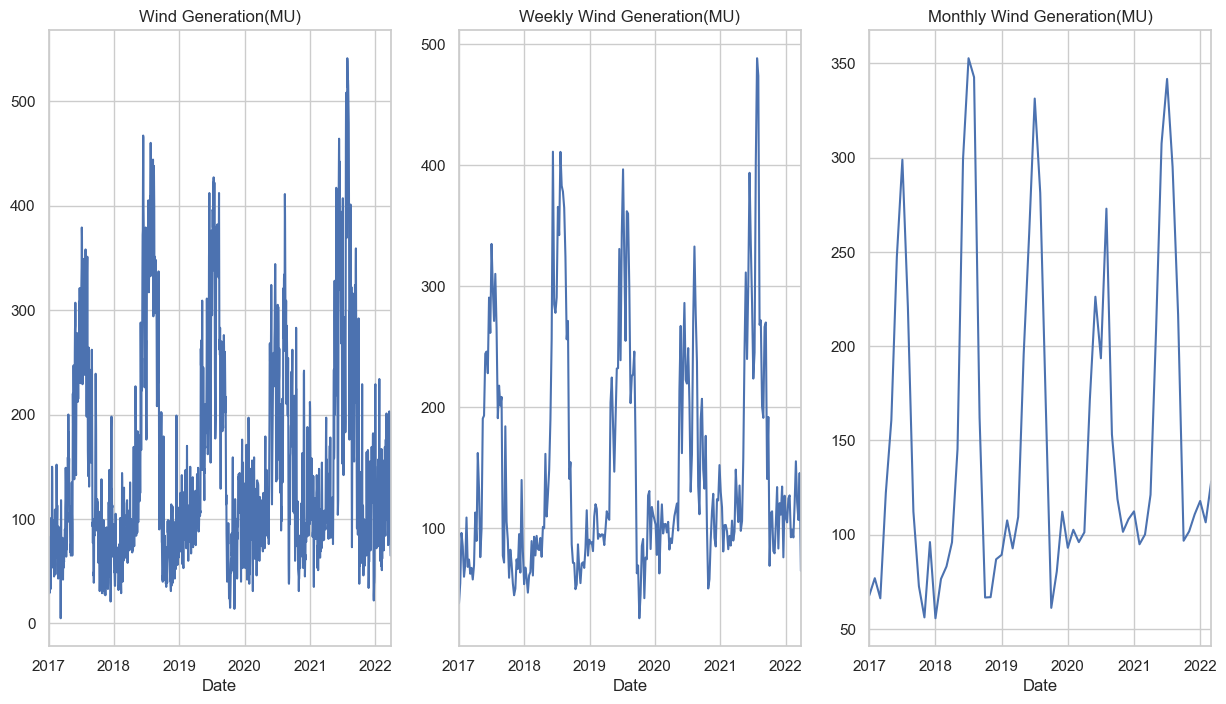

In [12]:
# Plotting data on daily ,weekly and monthly basis
for i, col in enumerate(df.columns):
    fig,ax = plt.subplots(1,3, figsize=(15,8))
    ax[0].set_title(col)
    ax[1].set_title("Weekly " + col)
    ax[2].set_title("Monthly " + col)
    df[col].plot(ax = ax[0])
    df[col].resample('7D').mean().plot(ax = ax[1])
    df[col].resample('M').mean().plot(ax = ax[2])
    plt.show()

In [13]:
# Creating a column which will store the price of bitcoin after two days 
df['Wind Generation(MU) after 365 days'] = df['Wind Generation(MU)'].shift(-365)

In [14]:
X = pd.DataFrame(df['Wind Generation(MU)'])
y =  pd.DataFrame(df['Wind Generation(MU) after 365 days'])

In [15]:
X = np.array(X.iloc[1:1547,:])
y = np.array(y.iloc[1:1547,:])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [18]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(f"Mean Absolute Error            : {round(mean_absolute_error(y_pred,y_test),2)}")
print(f"Mean Squared Error             : {round(mean_squared_error(y_pred,y_test),2)}")
print(f"Root Mean Squared Error        : {round(sqrt(mean_squared_error(y_pred,y_test)),2)}")
print(f"Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_pred,y_test),2)}")

C:\Users\deept\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error            : 61.54
Mean Squared Error             : 7149.58
Root Mean Squared Error        : 84.56
Mean Absolute Percentage Error : 0.4


In [19]:
forecast = rf.predict(np.array(df['Wind Generation(MU)'].tail(365)).reshape(-1,1))

C:\Users\deept\AppData\Local\Temp\ipykernel_12224\3926543195.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


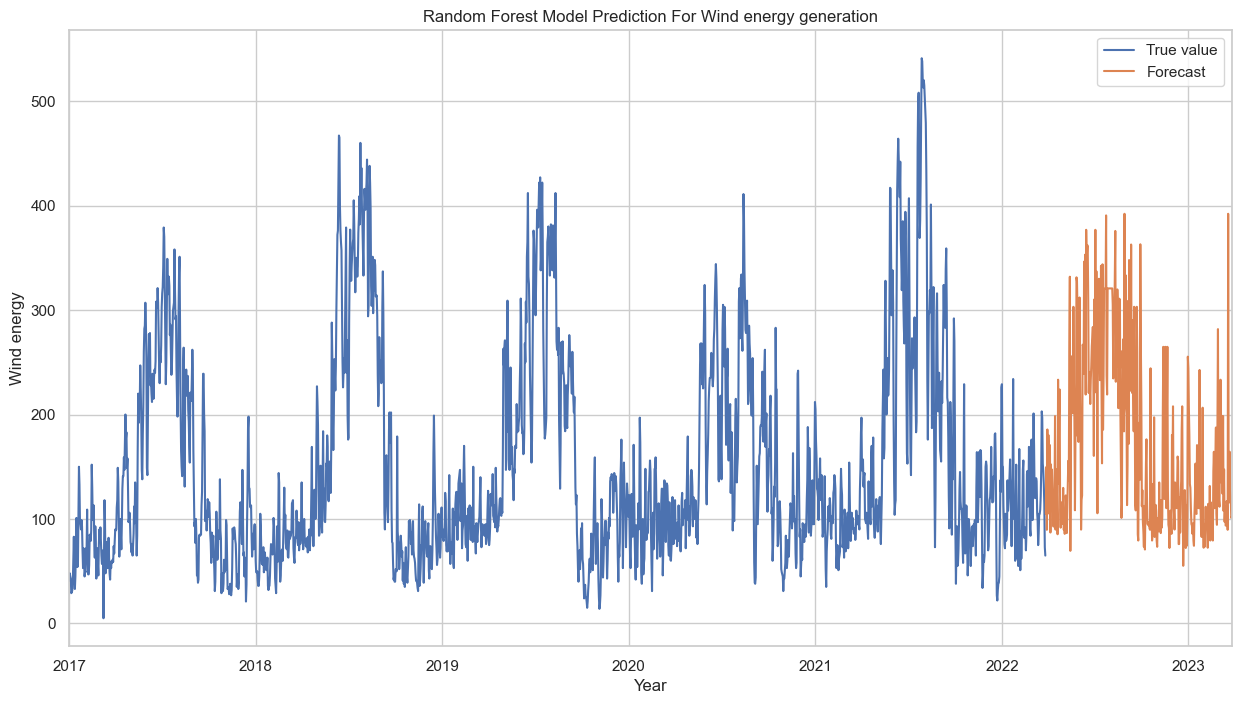

In [20]:
from datetime import datetime, timedelta
last_date = df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=365,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df = df.append(df1)
df['Wind Generation(MU)'].plot(figsize=(15,8), label = 'True value')
df['Forecast'].plot(label='Forecast')
plt.xlabel('Year')
plt.ylabel('Wind energy')
plt.title('Random Forest Model Prediction For Wind energy generation')
plt.legend()

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['Wind Generation(MU)', 'Wind Generation(MU) after 365 days'],
      dtype='<U34') instead.

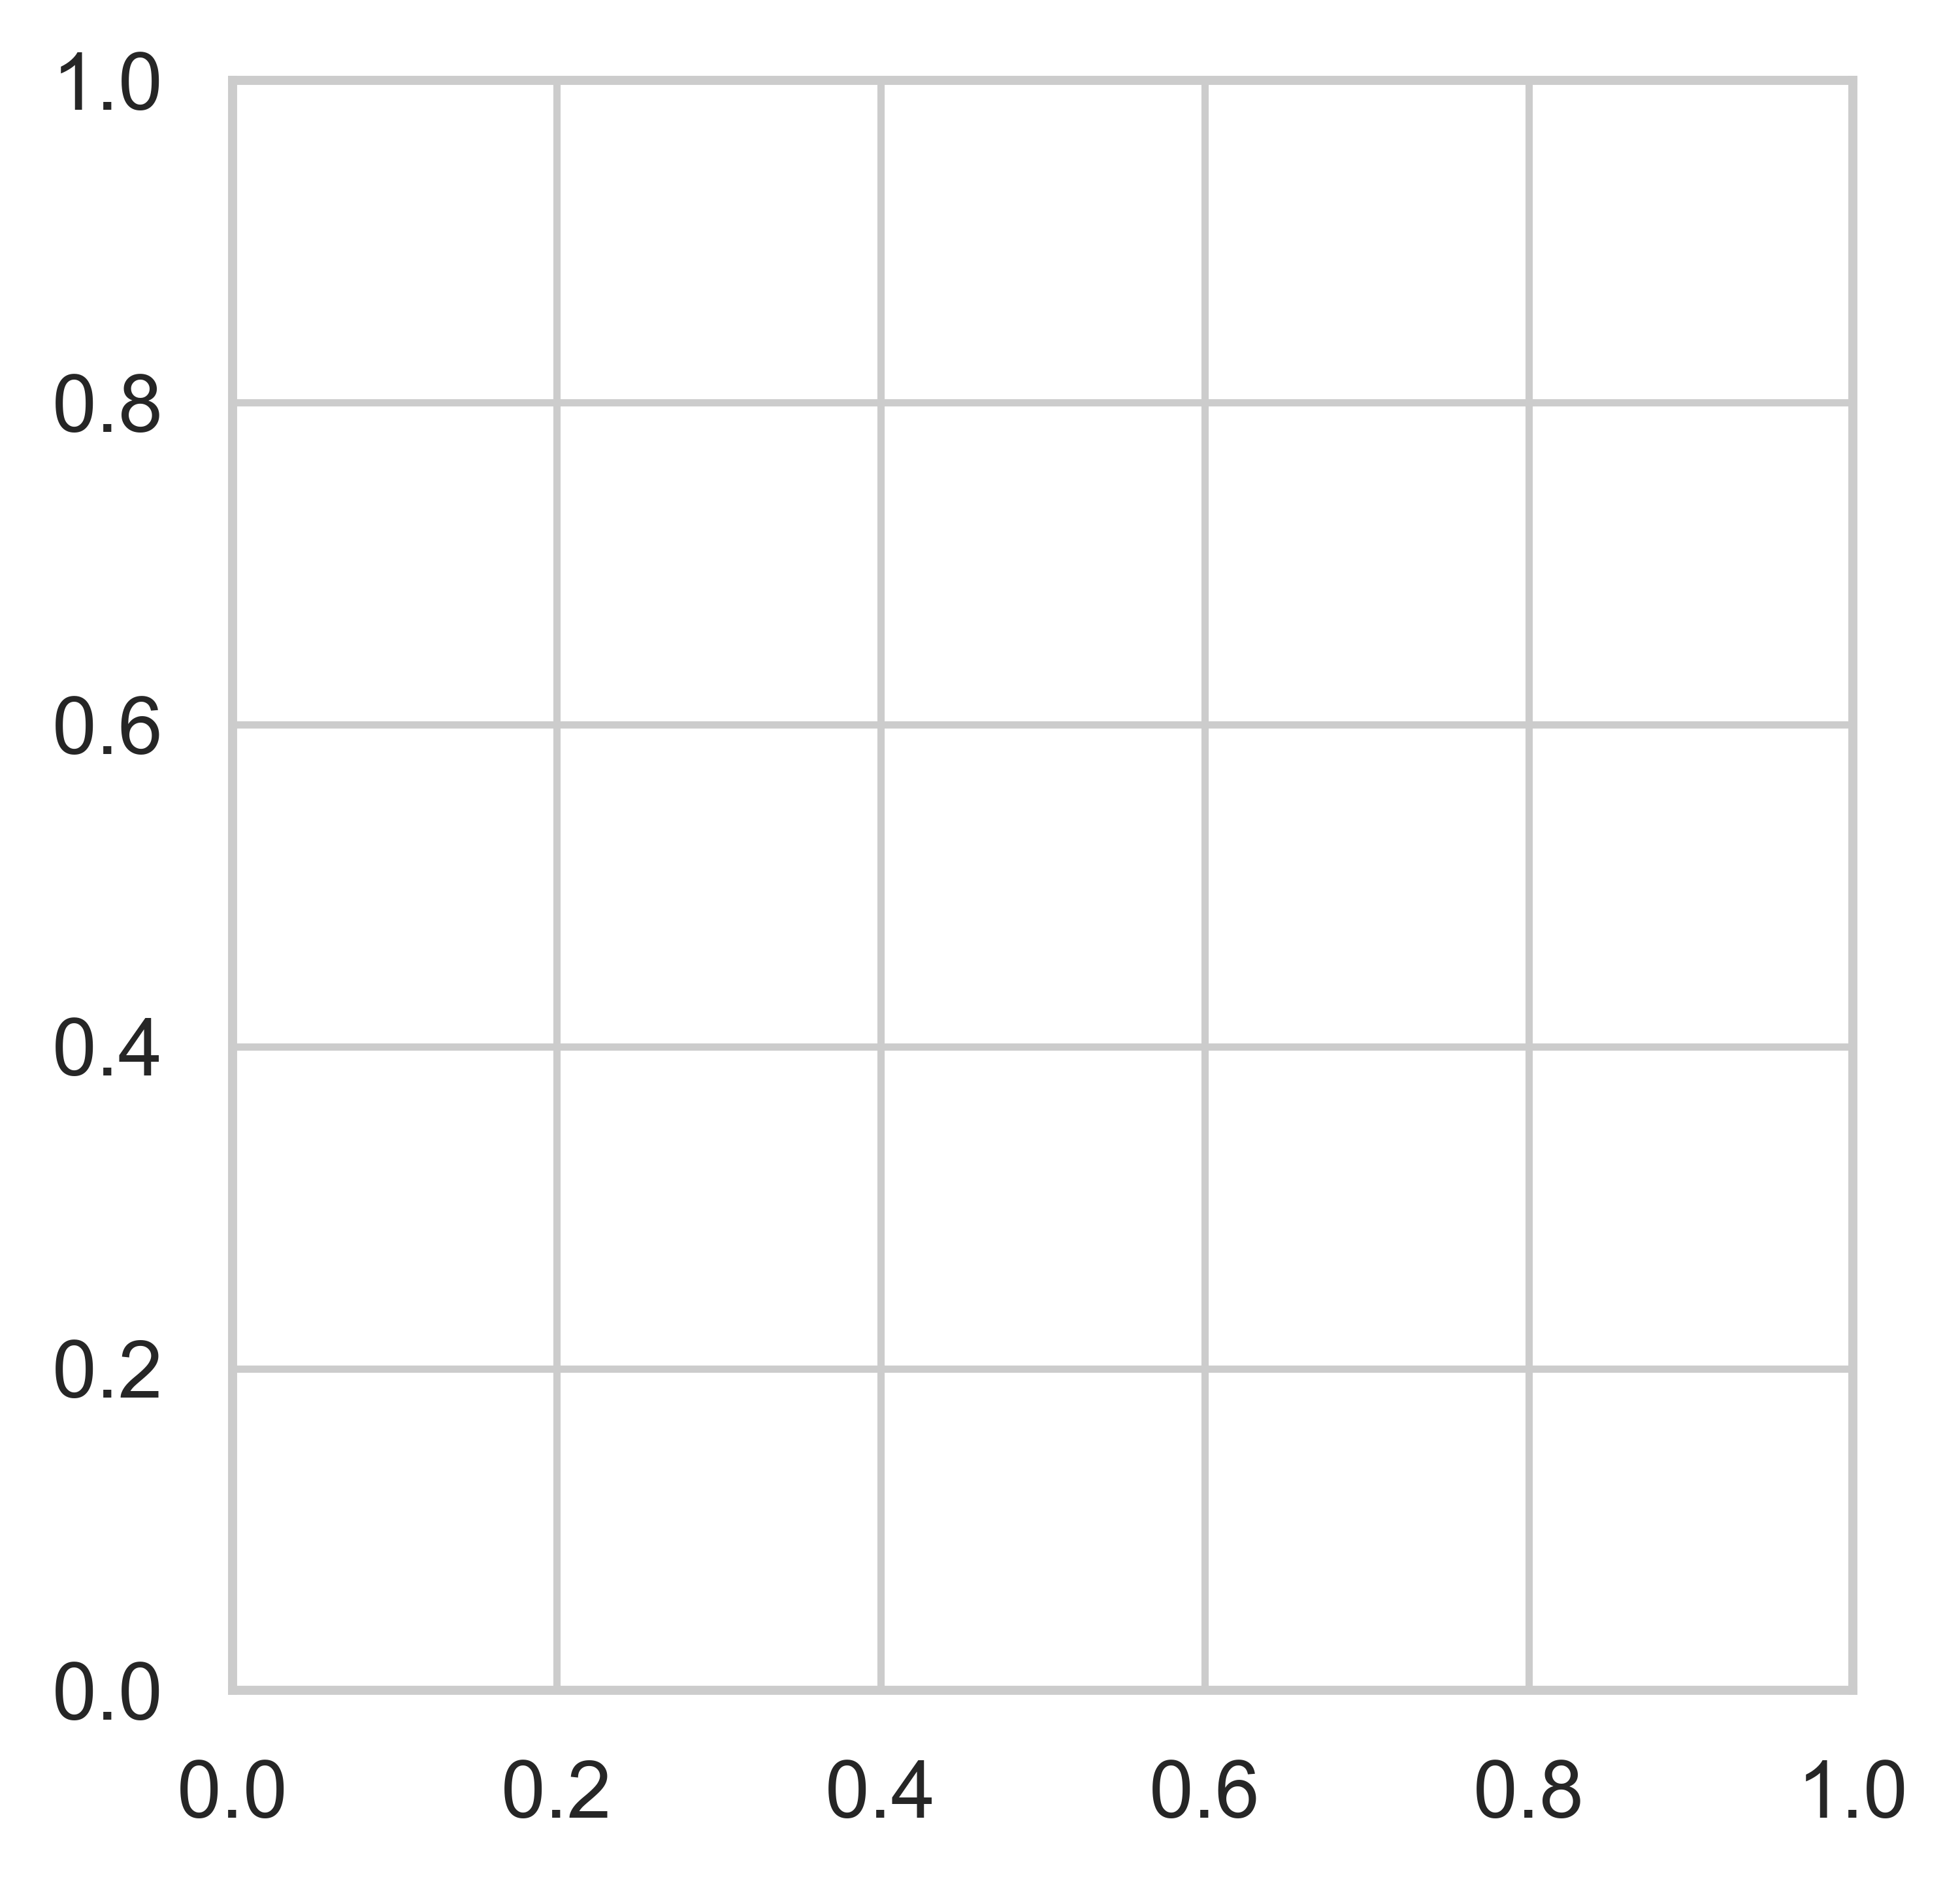

In [21]:
from sklearn import tree
feature_names = np.array([df.columns[0],df.columns[1]])
fn=feature_names
cn=df.columns[1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
df1

,Forecast
2022-03-28,105.937353
2022-03-29,150.246261
2022-03-30,87.554569
2022-03-31,184.462548
2022-04-01,113.912409
...,...
2023-03-23,166.902537
2023-03-24,117.948891
2023-03-25,130.161000
2023-03-26,101.015032


In [28]:
df1.describe()

,Forecast
count,365.000000
mean,175.269783
std,86.699345
min,59.360000
25%,105.790333
50%,141.255375
75%,235.218000
max,403.879190
